# **1. Load Iris Plants Dataset**

Reference: https://www.kaggle.com/code

In [1]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.style.use('seaborn-v0_8') # update

# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df =  pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = [iris.target_names[t] for t in iris.target]
target_col = 'target'
feature_col = iris.feature_names

In [2]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<u>**Data Set Characteristics**</u>

**Number of Instances**: 150 (50 in each of three classes)  
**Number of Attributes**: 4 numeric, predictive attributes and the class  

<u>**Attribute Information**</u>
- sepal length in cm  
- sepal width in cm  
- petal length in cm  
- petal width in cm  
- class:  
  - Iris-Setosa  
  - Iris-Versicolour  
  - Iris-Virginica  

<u>**Summary Statistics**</u>

| Features | Min | Max | Mean | SD | Class Correlation |
|-:|-:|-:|-:|-:|-:|
| sepal length | 4.3 | 7.9 | 5.84 | 0.83 | 0.7826 |
| sepal width | 2.0 | 4.4 | 3.05 | 0.43 | -0.4194 |
| petal length | 1.0 | 6.9 | 3.76 | 1.76 | 0.9490 (high!) |
| petal width | 0.1 | 2.5 | 1.20 | 0.76 | 0.9565 (high!) |

**Missing Attribute Values**: None  
**Class Distribution**: 33.3% for each of 3 classes.  
**Creator**: R.A. Fisher  
**Donor**: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)  
**Date**: July, 1988  

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.  

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.  

**References**
- Fisher, R.A. "The use of multiple measurements in taxonomic problems"
  Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
  Mathematical Statistics" (John Wiley, NY, 1950).
- Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
  (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
- Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
  Structure and Classification Rule for Recognition in Partially Exposed
  Environments".  IEEE Transactions on Pattern Analysis and Machine
  Intelligence, Vol. PAMI-2, No. 1, 67-71.
- Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
  on Information Theory, May 1972, 431-433.
- See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
  conceptual clustering system finds 3 classes in the data.
- Many, many more ...

In [3]:
from sklearn.model_selection import train_test_split

X = iris_df[feature_col]
y = iris_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=30)

# **2. K-Nearest Neighbors**

For Classification: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
For Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  

In [4]:
from sklearn.neighbors import KNeighborsClassifier

**Suggest Parameters**  

* **n_neighbors**: 4
* **weights**: distance

In [5]:
n_neighbors = 5 #@param {type:"slider", min:1, max:10, step:1}
weights = 'distance'  #@param ['uniform', 'distance']

knn = KNeighborsClassifier(
    n_neighbors=n_neighbors,
    weights=weights,
)

knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
# Predict as Class
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

# Predict as Probability
train_predict_prob = knn.predict_proba(X_train)

In [7]:
# Show first 10 prediction
print(train_predict[:10])

# Probability of 0/1
print(train_predict_prob[:10])

[0 1 1 2 2 1 2 2 2 1]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [8]:
# Actual Target
y_train[:10].tolist()

[0, 1, 1, 2, 2, 1, 2, 2, 2, 1]

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predict, labels=[0, 1])

array([[15,  0],
       [ 0, 13]])

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_predict , digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9286    0.8667    0.8966        15
           2     0.8750    0.9333    0.9032        15

    accuracy                         0.9333        45
   macro avg     0.9345    0.9333    0.9333        45
weighted avg     0.9345    0.9333    0.9333        45



# **3. Visualization**

Adapt from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

/var/folders/f4/v2gv23fs73v257yzqt1_zk2m0000gn/T/ipykernel_9008/3931540155.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:7:2])
/var/folders/f4/v2gv23fs73v257yzqt1_zk2m0000gn/T/ipykernel_9008/3931540155.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:6:2])
/Users/_.bosspee._/anaconda3/envs/dsde/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


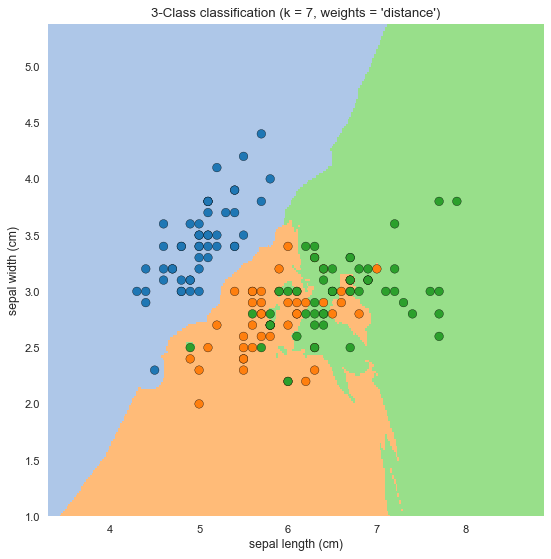

In [11]:
#@markdown # **Select parameters to plot**
#@markdown **(On simplyfied model for visualization - 2 variables)**
n_neighbors = 7 #@param {type:"slider", min:1, max:10, step:1}
weights = 'distance'  #@param ['uniform', 'distance']
x_label = 'sepal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_label = 'sepal width (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

x_idx = iris_df.columns.to_list().index(x_label)
y_idx = iris_df.columns.to_list().index(y_label)

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:7:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:6:2])
h = .02  # step size in the mesh

model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
model.fit(iris_df.iloc[:, [x_idx, y_idx]], iris_df[target_col])
x_min, x_max = iris_df.iloc[:, x_idx].min() - 1, iris_df.iloc[:, x_idx].max() + 1
y_min, y_max = iris_df.iloc[:, y_idx].min() - 1, iris_df.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  iris_df.iloc[:, x_idx],
  iris_df.iloc[:, y_idx],
  c=iris_df[target_col],
  cmap=cmap_bold,
  edgecolor='k',
  s=60
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))
plt.show()

# **4. Find the best K value**

## 4.1 Grid Search

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=dict(
        n_neighbors=[1,2,3,4,5,6,7,8,9,10],
        weights=['uniform', 'distance'],
    ),
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1 # Parallel
)

grid_start_time = time.time()
grid_search.fit(X_train, y_train)
grid_end_time = time.time()
print(f"Searching Time: {datetime.timedelta(seconds=grid_end_time-grid_start_time)}")

Searching Time: 0:00:02.641559


In [14]:
# Get Searching Result
grid_search_result = grid_search.cv_results_
pd.DataFrame.from_dict(grid_search_result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001021,0.000033,0.005194,0.004195,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.904762,1.000000,1.0,0.952137,0.952137,0.961807,0.035661,13
1,0.001174,0.000264,0.006067,0.007689,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.904762,1.000000,1.0,0.952137,0.952137,0.961807,0.035661,13
2,0.001122,0.001022,0.002880,0.002836,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.904762,1.000000,1.0,0.952137,0.902778,0.951935,0.043040,20
3,0.000941,0.000810,0.003802,0.003969,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.904762,1.000000,1.0,0.952137,0.952137,0.961807,0.035661,13
4,0.003408,0.002746,0.008434,0.005796,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.952137,1.000000,1.0,0.952137,1.000000,0.980855,0.023448,1
5,0.006396,0.005808,0.009209,0.007336,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.952137,1.000000,1.0,0.952137,1.000000,0.980855,0.023448,1
6,0.001174,0.000374,0.013460,0.011099,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.904762,1.000000,1.0,0.952137,0.952137,0.961807,0.035661,13
7,0.000738,0.000086,0.003623,0.003103,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.904762,1.000000,1.0,0.952137,0.952137,0.961807,0.035661,13
8,0.000879,0.000684,0.001874,0.000841,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.952137,0.952137,1.0,0.952137,0.952137,0.961709,0.019145,18
9,0.004111,0.005197,0.004266,0.003418,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.952137,1.000000,1.0,0.952137,0.952137,0.971282,0.023448,11


In [15]:
grid_search.best_estimator_

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
# Best Trained Model
model = grid_search.best_estimator_

In [17]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [18]:
# Predict with the best model
y_pred = model.predict(X_test)
y_pred[:10]

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2])

## 4.2 Randomized Search

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
rand_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=dict(
        n_neighbors=[1,2,3,4,5,6,7,8,9,10],
        weights=['uniform', 'distance'],
    ),
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

rand_start_time = time.time()
rand_search.fit(X_train, y_train)
rand_end_time = time.time()
print(f"Searching Time: {datetime.timedelta(seconds=rand_end_time-rand_start_time)}")

Searching Time: 0:00:00.083088


In [21]:
# Get Searching Result
rand_search_result = rand_search.cv_results_
pd.DataFrame.from_dict(rand_search_result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003135,0.002137,0.014252,0.010320,distance,2,"{'weights': 'distance', 'n_neighbors': 2}",0.904762,1.0,1.0,0.952137,0.952137,0.961807,0.035661,5
1,0.005486,0.003666,0.007463,0.006873,uniform,6,"{'weights': 'uniform', 'n_neighbors': 6}",0.904762,1.0,1.0,1.000000,0.902778,0.961508,0.047147,10
2,0.001315,0.000695,0.002622,0.000997,distance,1,"{'weights': 'distance', 'n_neighbors': 1}",0.904762,1.0,1.0,0.952137,0.952137,0.961807,0.035661,5
3,0.001222,0.000056,0.002476,0.000596,uniform,3,"{'weights': 'uniform', 'n_neighbors': 3}",0.952137,1.0,1.0,0.952137,1.000000,0.980855,0.023448,1
4,0.001488,0.001566,0.006916,0.007501,uniform,4,"{'weights': 'uniform', 'n_neighbors': 4}",0.904762,1.0,1.0,0.952137,0.952137,0.961807,0.035661,5
5,0.001400,0.001751,0.003089,0.003552,uniform,1,"{'weights': 'uniform', 'n_neighbors': 1}",0.904762,1.0,1.0,0.952137,0.952137,0.961807,0.035661,5
6,0.000551,0.000071,0.001369,0.000451,distance,10,"{'weights': 'distance', 'n_neighbors': 10}",0.952137,1.0,1.0,0.952137,1.000000,0.980855,0.023448,1
7,0.002046,0.002743,0.002055,0.000874,uniform,7,"{'weights': 'uniform', 'n_neighbors': 7}",0.952137,1.0,1.0,0.952137,1.000000,0.980855,0.023448,1
8,0.003575,0.003831,0.002303,0.001046,distance,7,"{'weights': 'distance', 'n_neighbors': 7}",0.952137,1.0,1.0,0.952137,1.000000,0.980855,0.023448,1
9,0.001159,0.000567,0.001824,0.000811,distance,4,"{'weights': 'distance', 'n_neighbors': 4}",0.904762,1.0,1.0,0.952137,0.952137,0.961807,0.035661,5


In [22]:
# Best Trained Model
model = rand_search.best_estimator_

In [23]:
# Predict with the best model
y_pred = model.predict(X_test)
y_pred[:10]

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2])